# Linear regression

KNN regression is sensitive to outliers and the distribution of the training data because it heavily relies on the neighboring data points for its predictions. An alternative approach could be to consider linear regression.

**Linear regression** is a statistical modeling technique used to establish a relationship between a dependent variable and one or more independent variables. It assumes a linear relationship between the dependent variable and the variable predicted based on the values of the independent variable. The goal of linear regression is to find the best-fit line that minimizes the difference between the predicted and actual values of the dependent variable. This line represents a linear equation that can be used to predict new data points. Unlike KNN regression, linear regression does not depend on neighboring data points and is less sensitive to outliers, making it suitable for datasets where a linear relationship is assumed or preferred.

In scikit-learn, linear regression is implemented as the **LinearRegression** class, which provides the fit(), score(), and predict() methods. After training, the coefficients of the linear equation $y = ax + b$ are saved as follows:

$a$ = lr.coef_,
$b$ = lr.intercept_.

Note that both lr.coef_ and lr.intercept_ are numpy arrays, not scalars.

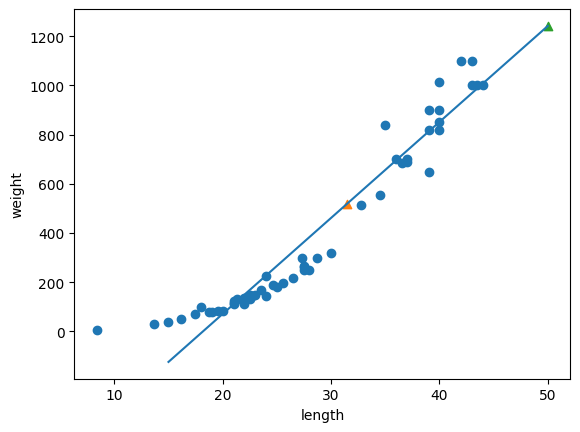

[[31.5]]cm perch will weigh [[520.0214214]]g.
[[50]]cm perch will weigh [[1241.83860323]]g.


In [15]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

#data : perch length and weight
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0])
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0])

# converts (length, ) into (length, 1)
perch_length = perch_length.reshape(-1,1)
perch_weight = perch_weight.reshape(-1,1)

#input: perch_length & target: perch_weight
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

# declear the model class
lr = LinearRegression()

# train the model
lr.fit(train_input, train_target)

# new data and predictions for them
perchA_length = np.array([31.5]).reshape(-1,1)
perchB_length = np.array([50]).reshape(-1,1)
perchA_weight = lr.predict(perchA_length)
perchB_weight = lr.predict(perchB_length)

# the linear function with coefficients (after training)
f = lambda x : np.squeeze(lr.coef_) * x + np.squeeze(lr.intercept_)

plt.scatter(perch_length, perch_weight)
plt.scatter(perchA_length, perchA_weight, marker='^')
plt.scatter(perchB_length, perchB_weight, marker='^')
plt.plot([15,50], [f(15),f(50)])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

print(f"{perchA_length}cm perch will weigh {perchA_weight}g.")
print(f"{perchB_length}cm perch will weigh {perchB_weight}g.")


After training, we can check the R2 scores for the training and test sets. The problems with the results of linear regression are: 

1. The weight of perch can be negative.
2. The actual scatter plot exhibits a curved pattern rather than a linear relation ship.

To address this issues, we can consider using polynomial regression.

In [17]:
# R^2 scores
score_by_training = lr.score(train_input, train_target)
score = lr.score(test_input, test_target)
print(f"score : {score_by_training} (training data)")
print(f"score : {score} (test data)")

score : 0.9398463339976041 (training data)
score : 0.824750312331356 (test data)


The problems with the results of linear regression are: 

1. The weight of perch can be negative.
2. The actual scatter plot exhibits a curved pattern rather than a linear relation ship.

To address this issues, we can consider using polynomial regression.